**Fonte:**
este material é uma tradução e adaptação dos notebooks: <br/> https://github.com/AutoGIS-2019/Exercise-2/blob/master/Exercise-2-problem-1.ipynb <br/> https://github.com/AutoGIS-2019/Exercise-2/blob/master/Exercise-2-problem-2.ipynb <br/> https://github.com/AutoGIS-2019/Exercise-2/blob/master/Exercise-2-problem-3.ipynb

# Exercício 2

Neste exercício vamos criar geometrias em Geopandas, re-projetar dados e fazer algumas
cálculos geométricos.


## Problema 1: criar polygon de uma lista de coordenadas.

No primeiro problema **você deve criar um polígono com base nas coordenadas fornecidas e mostrar o polígono em um mapa**. As listas ``xcoords`` e ``ycoords`` contêm as coordenadas x e y de pontos, que pertencem ao polígono. O primeiro par de coordenadas se parece com isto: ``(29.99671173095703, 63.748023986816406)``.

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

# X -coordinates 
xcoords = [29.99671173095703, 31.58196258544922, 27.738052368164062, 26.50013542175293, 26.652359008789062, 25.921663284301758, 22.90027618408203, 23.257217407226562,
           23.335693359375, 22.87444305419922, 23.08465003967285, 22.565473556518555, 21.452774047851562, 21.66388702392578, 21.065969467163086, 21.67659568786621,
           21.496871948242188, 22.339998245239258, 22.288192749023438, 24.539581298828125, 25.444232940673828, 25.303749084472656, 24.669166564941406, 24.689163208007812,
           24.174999237060547, 23.68471908569336, 24.000761032104492, 23.57332992553711, 23.76513671875, 23.430830001831055, 23.6597900390625, 20.580928802490234, 21.320831298828125,
           22.398330688476562, 23.97638702392578, 24.934917449951172, 25.7611083984375, 25.95930290222168, 26.476804733276367, 27.91069221496582, 29.1027774810791, 29.29846954345703,
           28.4355525970459, 28.817358016967773, 28.459857940673828, 30.028610229492188, 29.075136184692383, 30.13492774963379, 29.818885803222656, 29.640830993652344, 30.57735824584961,
           29.99671173095703]

# Y -coordinates
ycoords = [63.748023986816406, 62.90789794921875, 60.511383056640625, 60.44499588012695, 60.646385192871094, 60.243743896484375, 59.806800842285156, 59.91944122314453,
           60.02395248413086, 60.14555358886719, 60.3452033996582, 60.211936950683594, 60.56249237060547, 61.54027557373047, 62.59798049926758, 63.02013397216797,
           63.20353698730469, 63.27652359008789, 63.525691986083984, 64.79915618896484, 64.9533920288086, 65.51513671875, 65.65470886230469, 65.89610290527344, 65.79151916503906,
           66.26332092285156, 66.80228424072266, 67.1570053100586, 67.4168701171875, 67.47978210449219, 67.94589233398438, 69.060302734375, 69.32611083984375, 68.71110534667969,
           68.83248901367188, 68.580810546875, 68.98916625976562, 69.68568420410156, 69.9363784790039, 70.08860778808594, 69.70597076416016, 69.48533630371094, 68.90263366699219,
           68.84700012207031, 68.53485107421875, 67.69471740722656, 66.90360260009766, 65.70887756347656, 65.6533203125, 64.92096710205078, 64.22373962402344, 63.748023986816406]


**Primeiro, crie uma variável Polygon `poly` fora das coordenadas x e y:**

- Crie uma lista de pares de coordenadas x e y de xcoords e ycoords e armazene-os em uma variável `coordpairs`. Um par de coordenadas pode ser uma tupla ou uma lista.
- Crie um polígono usando a lista 'coordpairs' e armazene o polígono em uma variável `poly`.

**Insira o polígono em um GeoDataFrame chamado ``geo``:**
- Crie uma variável geodataframe vazia ``geo``
- Insira um polígono 'poly' no 'geo' em uma nova coluna chamada 'geometry' usando o indexador 'loc'

In [2]:
# Create a list of x and y coordinate pairs out of xcoords and ycoords
coordpairs = [[xcoord, ycoord] for xcoord, ycoord in zip(xcoords, ycoords)]

# Create a shapely Polygon using the 'coordpairs' -list
poly = Polygon(coordpairs)

# Create an empty GeoDataFrame
geo = gpd.GeoDataFrame()

# Insert the 'poly' -polygon into the 'geo' GeoDataFrame into a new column named 'geometry' 


# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
geo.loc[0, 'geometry'] = poly

In [3]:
# Check the content of the GeoDataFrame:
print(geo.head())


                                            geometry
0  POLYGON ((29.99671173095703 63.74802398681641,...


**Por último:**
- salve o polígono em um arquivo Shapefile chamado `'polygon.shp'`.
- mostrar o polygono usando a função 'plot'

In [4]:
# Save the GeoDataFrame into a new Shapefile called 'polygon.shp'.
fp = 'data/polygon.shp'

# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
geo.to_file(fp)

In [5]:
# Plot a map of the polygon 


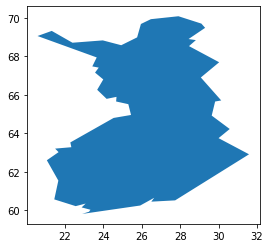

In [6]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
geo.plot()

## Problema 2: operação de pontos com mapa

O problema 2 continua o processo que começamos no Exercício 1, ou seja, criar objetos de ponto geométrico e colocá-los em um mapa.

**Neste problema, nosso objetivo é plotar um mapa baseado em um conjunto de coordenadas x e y que são armazenadas em um arquivo csv.**

As coordenadas estão em graus decimais WGS84, e os dados são armazenados no arquivo separado por vírgulas `some_posts.csv` na pasta `data`. As primeiras linhas dos dados são assim:

```
lat,lon,timestamp,userid
-24.980792492,31.484633302,2015-07-07 03:02,66487960
-25.499224667,31.508905612,2015-07-07 03:18,65281761
-24.342578456,30.930866066,2015-03-07 03:38,90916112
-24.85461393,31.519718439,2015-10-07 05:04,37959089
```

Os dados têm 81379 linhas e consistem em locais e horários de postagens nas redes sociais dentro do parque nacional Kruger na África do Sul:

| Column | Description |
|--------|-------------|
| lat | y-coordinate of the post |
| lon | x-coordinate of the post |
| timestamp | Time when the post was uploaded |
| userid | userid |

*Nota: embora os dados sejam baseados em dados reais de mídias sociais, eles estão anônimos. Os dados de userids e timestamps foram randomizados, ou seja, eles não coincidem com os dados reais, também a precisão espacial dos dados foi reduzida.*

**Primeiro:**

- Importe os módulos necessários
- Leia os dados de `data / some_posts.csv` em um dataframe do Pandas chamado` data`
- Crie uma coluna vazia chamada `geometry` onde você irá armazenar objetos Point bem formados
- Inserir objetos Point na coluna `geometry` baseada nas colunas de coordenadas
    - Você pode querer iterar sobre as linhas do dataframe e usar o indexador `.loc` para atualizar o valor da coluna correta em cada linha. [Veja mais dicas no notebook sobre GeoPandas](https://github.com/CarlosJun/Data-Science/blob/master/AutoGIS/Lesson%202/geopandas-basics.ipynb)
    - *Nota: se esta etapa estiver demorando muito para ser executada, você pode primeiro testar seu código com um subconjunto dos dados originais, por exemplo. pegando as primeiras 50 linhas de dados `data [: 50]`. Depois que o código funcionar corretamente, você poderá executar o processo para todo o dataframe.*
    - Opcional: você também pode tentar resolver este problema usando ``pandas.DataFrame.apply`` ou a função `` zip ()`` (estas abordagens serão muito mais rápidas do que usar um laço ``for`` e ``.iterrows ()``

In [7]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
import pandas as pd
import numpy as np
from shapely.geometry import Point

fp = 'data/some_posts.csv'
data = pd.read_csv(fp,',')
data['geometry'] = np.nan

def latlon_point(row):
    row['geometry'] = Point(row['lon'], row['lat']) 
    return row

data = data.apply(lambda row: latlon_point(row), axis=1)

In [8]:
# Check the dataframe head
print(data.head())

         lat        lon         timestamp    userid  \
0 -24.980792  31.484633  2015-07-07 03:02  66487960   
1 -25.499225  31.508906  2015-07-07 03:18  65281761   
2 -24.342578  30.930866  2015-03-07 03:38  90916112   
3 -24.854614  31.519718  2015-10-07 05:04  37959089   
4 -24.921069  31.520836  2015-10-07 05:19  27793716   

                             geometry  
0  POINT (31.484633302 -24.980792492)  
1  POINT (31.508905612 -25.499224667)  
2  POINT (30.930866066 -24.342578456)  
3   POINT (31.519718439 -24.85461393)  
4  POINT (31.520835558 -24.921068894)  


**Próximo:**
- Converta esse DataFrame em um GeoDataFrame, [Veja dicas](https://automating-gis-processes.github.io/2018/lessons/L2/exercise-2.html)

- Atualize o CRS para o sistema de coordenadas como WGS84 (ou seja, código epsg: 4326)

- Salve os dados em um Shapefile chamado `Kruger_posts.shp`

In [9]:
import geopandas as gpd
from fiona.crs import from_epsg

geo = gpd.GeoDataFrame(data, geometry='geometry', crs=from_epsg(4326))

fp = 'data/Kruger_posts.shp'
geo.to_file(fp)

In [10]:
# Check the geodataframe head
print(geo.head())

         lat        lon         timestamp    userid  \
0 -24.980792  31.484633  2015-07-07 03:02  66487960   
1 -25.499225  31.508906  2015-07-07 03:18  65281761   
2 -24.342578  30.930866  2015-03-07 03:38  90916112   
3 -24.854614  31.519718  2015-10-07 05:04  37959089   
4 -24.921069  31.520836  2015-10-07 05:19  27793716   

                             geometry  
0  POINT (31.484633302 -24.980792492)  
1  POINT (31.508905612 -25.499224667)  
2  POINT (30.930866066 -24.342578456)  
3   POINT (31.519718439 -24.85461393)  
4  POINT (31.520835558 -24.921068894)  


**Por último:**
- Crie um mapa simples dos pontos (um deles é suficiente):
     - Crie o mapa usando a função `.plot ()` no Python. Você pode precisar usar o método `matplotlib.pyplot.show()` para exibir a imagem dentro deste bloco de notas.

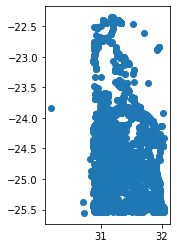

In [11]:
# REPLACE THE ERROR BELOW WITH YOUR OWN CODE
geo.plot()

## Problem 3: o quanto de distância as pessoas viajaram?

Neste problema, o objetivo é calcular a distância em metros que os indivíduos percorreram de acordo com os
_posts_ nas redes sociais (distâncias euclidiana entre os pontos).

Usaremos o shapefile "Kruger_posts.shp" gerado no Problema 2 como entrada.

**Você pode seguir os seguintes passos:**
  - leia o arquivo shapefile como um geodataframe
  - Reprojetar os dados da projeção WGS84 para a projeção `EPSG: 32735` que significa Zona UTM 35S (zona UTM para a África do Sul) para transformar os dados em sistema métrico.
  - Agrupar os dados pelo ID do usuário.

In [12]:
import geopandas as gpd

fp = 'Kruger_posts.shp'
data = gpd.read_file(fp)
data = data.to_crs(epsg=32735)

In [13]:
# Check that the crs is correct (should be epsg:32735)
print(data.crs)

{'init': 'epsg:32735', 'no_defs': True}


In [14]:
data_grouped = data.groupby(['userid'])

**Em seguida:**
- Crie um GeoDataFrame vazio chamado `movements`
- Para cada usuário:
     - [ordene](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html) as linhas por timestamp;
     - crie um objeto LineString baseado nos _posts_ do usuário;
     - [adicione](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.append.html) a geometria e o userid no GeoDataFrame que você criou na última etapa;
- Defina o CRS dos ``movements`` GeoDataFrame como `` EPSG: 32735`` (código epsg: 32735)

In [15]:
from fiona.crs import from_epsg
from shapely.geometry import LineString
movements = gpd.GeoDataFrame(columns=['userid','geometry'], geometry='geometry', crs=from_epsg(32735))

# iterate over each group
list_df = []
idx = 0
for userid, df_group in data_grouped:
    sort_df = df_group.sort_values(['timestamp'])
    
    if(len(sort_df.index) > 1):
        line = LineString(sort_df['geometry'].tolist())
        list_df.append({'userid': userid, 'geometry': line})
        idx += 1
        
movements = movements.append(list_df)

In [16]:
movements.crs

{'init': 'epsg:32735', 'no_defs': True}

**Por último:**
- Calcule os comprimentos das linhas em uma nova coluna chamada ``distance`` no GeoDataFrame ``movements``.
- Salve o ``movements`` em um Shapefile chamado ``Some Movements.shp``

In [17]:
movements['distance'] = movements.length

fp = 'data/Some_movements.shp'
movements.to_file(fp)

Agora você deve poder imprimir respostas para as seguintes perguntas:

- Qual foi a menor distância percorrida em metros?
- Qual foi a distância média percorrida em metros?
- Qual foi a distância máxima percorrida em metros?

In [18]:
#shortest distance
print("shortest distance ", movements['distance'].min())
#mean distance
print("mean distance ", movements['distance'].mean())
#maximum distance
print("maximum distance ", movements['distance'].max())

shortest distance  0.0
mean distance  107133.51202944388
maximum distance  6970668.8163439585
